In [2]:
from scipy import integrate as integ
from scipy.interpolate import interp1d
import numpy as np

### Load Equation of State

open equation of state in directory eos, the filename in given example should be eos_APR.dat

The eos file should contain three columns with corresponding values of 

energy density in  g.cm$^{-3}$ 
pressure in dyne.cm$^{-2}$
baryon number density in cm$^{-3}$

In [3]:
eos = 'APR'
filename="eos/eos_"+eos+".dat"

e,p,n=np.genfromtxt(filename, unpack=True,skip_header=0)
eos_e_s = np.flip(e)
eos_P_s = np.flip(p)
eos_n_s = np.flip(n)

### Optional load from compose

This enables one to load EoS from compose database 

The content downloaded from compose (https://compose.obspm.fr/) should be unzipped in the directory eos_compose

## Please 



Cite the database 

[S. Typel, M. Oertel, T. Klähn, Phys.Part.Nucl. 46, 633](https://link.springer.com/article/10.1134/S1063779615040061)

[M. Oertel, M. Hempel, T. Klähn, S. Typel, Rev. Mod. Phys. 89, 015007](https://journals.aps.org/rmp/abstract/10.1103/RevModPhys.89.015007)

[S. Typel, M. Oertel, T. Klähn et al, arxiv:2203.03209](https://arxiv.org/pdf/2203.03209.pdf)

Cite original papers of the equations of state you selected.

Check the manual (https://compose.obspm.fr/manual).



In [40]:
filename="eos_compose/eos.nb"

n=np.genfromtxt(filename, unpack=True,skip_header=2)
eos_n_c = n*1.e39


filename="eos_compose/eos.thermo"


#see CompOSE manual 2.0 page 28 to understand symbols 
i_T,i_nb,i_Yq,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Nadd=np.genfromtxt(filename, unpack=True,skip_header=1)

if Nadd[0]==0:
     print("Table .thermo loaded ")
     if len(n)==len(i_nb):
        print("Same length of tables")
     else:
        print("Same length of tables")
        
else:
    print("more colums in the table")



#print(len(i_nb),len(n),i_nb[len(i_nb)-1])
print(Q1)

#First row contains mass of neutron, proton (in MeV) and whether leptons are considered
mn,mp,lept=np.genfromtxt(filename, unpack=True,skip_footer=len(a1))

print(mn,mp,lept)

P=Q1*n #pressure in MeV/fm^3
e=n*mn*(Q7+1) #energy density in MeV/fm^3


MeV_2_erg=1.6021766339999e-6 #erg=dyne.cm

c_2 = 29979245800.**2 #c^2 in cm/s

eos_p_c=P*MeV_2_erg*1.e39
#print(eos_p_c)

eos_e_c=e*MeV_2_erg*1.e39/c_2
#print(eos_e_c)

if eos_p_c[0]>1.15:
    print("WARNING: Check if the EoS contains outer crust and not just inner crust.")
    print("If necessary add low density equation of state (e.g. BPS, BBP )")


Table .thermo loaded 
Same length of tables
[2.38069662e-05 4.80034888e-05 9.67924647e-05 1.95168757e-04
 3.93531084e-04 7.93501566e-04 1.59998730e-03 3.22615539e-03
 6.50510076e-03 1.31166453e-02 2.29863113e-02 3.85098418e-02
 6.14647759e-02 6.56563375e-02 8.98022006e-02 1.20196563e-01
 1.58076697e-01 2.05104879e-01 2.63554386e-01 2.74016146e-01
 3.22264000e-01 3.78160517e-01 4.09418414e-01 4.30739487e-01
 4.43250888e-01 5.18539347e-01 5.86879020e-01 6.85535854e-01
 7.32078313e-01 7.91002763e-01 8.25245024e-01 8.91462284e-01
 9.62991703e-01 1.02682631e+00 1.06741822e+00 1.15285116e+00
 1.22771714e+00 1.27125026e+00 1.37297506e+00 1.47129887e+00
 1.42558934e+00 1.49538485e+00 1.58988631e+00 1.63327571e+00
 1.63512060e+00 1.70783254e+00 1.82378174e+00 1.87754742e+00
 1.89396696e+00 1.89910566e+00 1.92633200e+00 1.96800086e+00
 1.98892920e+00 2.00651688e+00 1.97783671e+00 1.06599406e+00
 1.12898624e+00 1.23024954e+00 1.34958672e+00 1.47725140e+00
 1.73965963e+00 1.99787399e+00 2.24751308

In [41]:
eos_e=eos_e_c
eos_n=eos_n_c
eos_P=eos_p_c

### Define constants

In [42]:
G=6.6743e-8
Msun=1.98847e+33

In [43]:
def edens(Press, eos_P, eos_e):
    en = np.interp(Press, eos_P, eos_e)
    return en

def tov(y, r, eos_P, eos_e):
    P, m = y
    e = edens(P, eos_P, eos_e)
    dydr = [-G*(e + P/c_2)*(m + 4.0*np.pi*r**3*P/c_2)/(r*(r - 2.0*G*m/c_2)), 4.0*np.pi*r**2*e]
    return dydr

In [44]:
Pc_max = eos_P[len(eos_P)-1]
Pc_min = 2.e33
Pc_ar = np.logspace(np.log10(Pc_min), np.log10(Pc_max), 300)
#Pc_ar=[eos_P[len(eos_P)-1]]
M_ar = np.zeros(len(Pc_ar))
R_ar = np.zeros(len(Pc_ar))
P_ar = np.zeros(len(Pc_ar))
ec_ar = np.zeros(len(Pc_ar))
Perr_ar=np.zeros(len(Pc_ar))
errors = 0
i=0
for Pcen in Pc_ar:
        ecen = np.interp(Pcen, eos_P, eos_e)
        rpoints = 30000
        r = np.linspace(10., 100.e5, rpoints+1)
        y0 = [Pcen, 4.*np.pi*ecen*r[0]**3/3.]
        sol=[np.zeros(rpoints),np.zeros(rpoints)]
        sol = integ.odeint(tov, y0, r, args=(eos_P, eos_e))   #sol is 2D array of corresponding values of Y i.e. P and m(r)
#        print(sol)
        Msol = interp1d(sol[:, 0], sol[:, 1])
        rsol = interp1d(sol[:, 0], r)
        Mass = Msol(0.) / Msun
        Rad = rsol(0.) / 1.e5
        P_ar[i]=Pcen
        ecen = edens(Pcen, eos_P, eos_e)
        M_ar[i]=Mass
        R_ar[i]=Rad
        ec_ar[i]=ecen

        if (sol[rpoints, 0] > 0.):            
            errors += 1
            Perr_ar[i]=1
        i+=1
    
print(f"Number of errors: {errors}")
imax=np.argmax(M_ar)
print(imax)
print(M_ar[imax],R_ar[imax])



/Users/martin/miniconda3/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Number of errors: 0
287
1.9245736001910239 9.570090426642508


### Plot results

In [45]:
import matplotlib.pyplot as plt

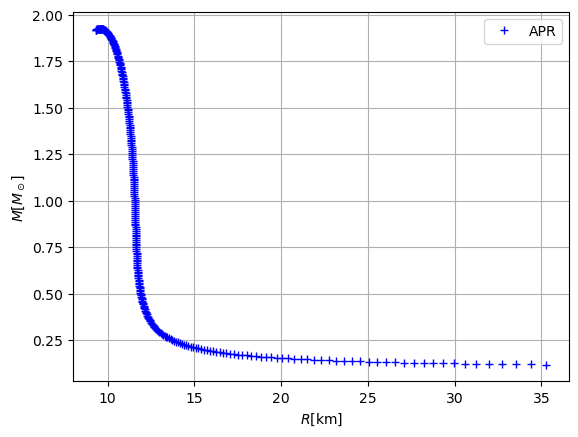

In [46]:
plt.plot(R_ar, M_ar, 'b+',label=eos)
plt.xlabel(r'$R$[km]')
plt.ylabel(r'$M[M_\odot]$')
plt.grid()
plt.legend()
#plt.show()


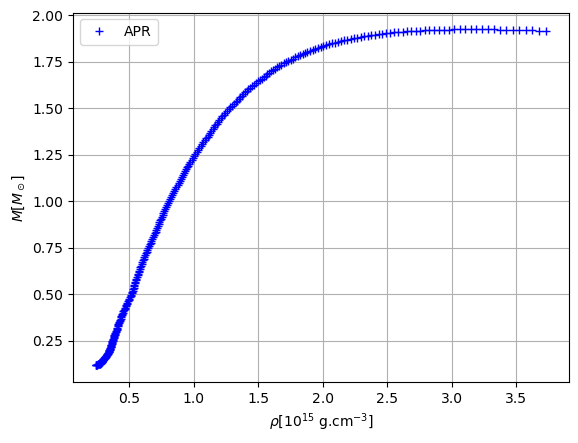

In [47]:
plt.plot(ec_ar/1.e15, M_ar, 'b+',label=eos)
plt.xlabel(r'$\rho$[10$^{15}$ g.cm$^{-3}$]')
plt.ylabel(r'$M[M_\odot]$')
plt.grid()
plt.legend()
#plt.show()
